# 一、 最值归一化 normalization
* 把所有数据映射到0~1之间
* 适用于分布有明显边界的情况, 受outlier影响较大
### $x_{scale} = \frac{x - x_{min}}{x_{max} - x_{min}}$

$\frac{x-1}{y}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 对于一维向量

In [2]:
x = np.random.randint(0,100,100)
x

array([86, 76, 61, 80, 32, 30,  7, 47, 24, 59, 24, 89, 70, 84,  1, 20, 75,
       42, 61, 30, 68, 54, 60, 99, 33,  7, 54, 92, 32, 21, 44, 66, 49, 51,
       44, 89, 98, 43, 28, 18, 77, 37, 25, 72, 67,  7, 69, 88, 59,  5, 92,
        1, 14, 57, 36, 87, 92,  3, 81, 53, 11, 38,  8,  2, 83,  6,  7, 28,
       79,  9, 51, 64, 23, 16, 51, 90, 81, 18, 41, 39, 87, 26, 88,  1,  0,
       83, 64, 69, 22, 20, 75, 52, 31, 70, 84, 59, 45, 49, 57, 58])

In [3]:
(x - np.min(x))/(np.max(x)-np.min(x))

array([0.86868687, 0.76767677, 0.61616162, 0.80808081, 0.32323232,
       0.3030303 , 0.07070707, 0.47474747, 0.24242424, 0.5959596 ,
       0.24242424, 0.8989899 , 0.70707071, 0.84848485, 0.01010101,
       0.2020202 , 0.75757576, 0.42424242, 0.61616162, 0.3030303 ,
       0.68686869, 0.54545455, 0.60606061, 1.        , 0.33333333,
       0.07070707, 0.54545455, 0.92929293, 0.32323232, 0.21212121,
       0.44444444, 0.66666667, 0.49494949, 0.51515152, 0.44444444,
       0.8989899 , 0.98989899, 0.43434343, 0.28282828, 0.18181818,
       0.77777778, 0.37373737, 0.25252525, 0.72727273, 0.67676768,
       0.07070707, 0.6969697 , 0.88888889, 0.5959596 , 0.05050505,
       0.92929293, 0.01010101, 0.14141414, 0.57575758, 0.36363636,
       0.87878788, 0.92929293, 0.03030303, 0.81818182, 0.53535354,
       0.11111111, 0.38383838, 0.08080808, 0.02020202, 0.83838384,
       0.06060606, 0.07070707, 0.28282828, 0.7979798 , 0.09090909,
       0.51515152, 0.64646465, 0.23232323, 0.16161616, 0.51515

#### 对于二维矩阵

In [4]:
x = np.random.randint(0,100, (50,2))
x[:10, :]

array([[68, 85],
       [54, 44],
       [36, 14],
       [38, 68],
       [51, 63],
       [50,  9],
       [34, 77],
       [37, 85],
       [96, 81],
       [93, 64]])

In [5]:
# 上面randint生成的是int类型, 而我们转换为0-1之间后是float类型
# 数据需要转换
x = np.array(x, dtype=float)
x[:10, :]

array([[68., 85.],
       [54., 44.],
       [36., 14.],
       [38., 68.],
       [51., 63.],
       [50.,  9.],
       [34., 77.],
       [37., 85.],
       [96., 81.],
       [93., 64.]])

In [6]:
# 将第0列数据进行归一化
x[:,0] = (x[:,0] - np.min(x[:,0]))/(np.max(x[:,0] - np.min(x[:,0])))
x[:,1] = (x[:,1] - np.min(x[:,1]))/(np.max(x[:,1] - np.min(x[:,1])))
x[:10, :]

array([[0.68041237, 0.86458333],
       [0.53608247, 0.4375    ],
       [0.35051546, 0.125     ],
       [0.37113402, 0.6875    ],
       [0.50515464, 0.63541667],
       [0.49484536, 0.07291667],
       [0.32989691, 0.78125   ],
       [0.36082474, 0.86458333],
       [0.96907216, 0.82291667],
       [0.93814433, 0.64583333]])

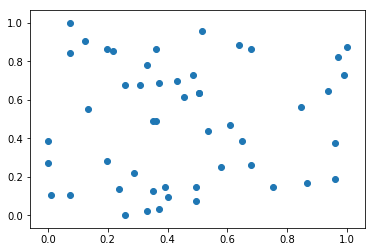

In [7]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [8]:
np.mean(x[:,0])

0.4519587628865979

In [9]:
np.std(x[:,0])

0.2810889351756117

# 二、 均值方差归一化 standardization
* 把所有数据归一到均值为0, 方差为1的分布中
* 数据分布没有明显边界, 可能存在极端数据值
### $x_{scale} = \frac{x - x_{mean}}{S}$

In [10]:
x2 = np.random.randint(0,100,(50,2))
x2 = np.array(x2, dtype=float)
x2[:,0] = (x2[:,0] - np.mean(x2[:,0]))/np.std(x2[:,0])
x2[:,1] = (x2[:,1] - np.mean(x2[:,1]))/np.std(x2[:,1])

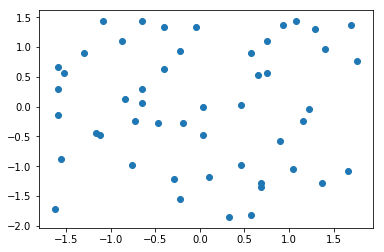

In [11]:
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [12]:
np.mean(x2[:,0])

-1.1102230246251566e-17

In [13]:
np.std(x2[:,1])

1.0

# 三、 sklearn中的scaler

测试数据集归一化应该如下:
### $\frac{x\_test\ \ -\ \ mean\_train}{std\_train}$

In [14]:
from sklearn import datasets
import numpy as np

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:
X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## scikit-learn中的StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
standard_scaler = StandardScaler()

In [21]:
standard_scaler.fit(X_train) # 计算出了特征信息

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
standard_scaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [24]:
standard_scaler.scale_  # 标准差

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [25]:
X_train = standard_scaler.transform(X_train)
X_train

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [26]:
X_test_standard = standard_scaler.transform(X_test)
X_test_standard

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684],
       [ 1.06867274,  0.03970336,  0.39186171,  0.30602392],
       [-1.64672287, -1.77530738, -1.36655271, -1.15228502],
       [-1.27644165,  0.03970336, -1.19638358, -1.28485856],
       [-0.53587921,  0.72033239, -1.25310662, -1.01971148],
       [ 1.68580811,  1.17408507,  1.35615349,  1.76433286],
       [-0.04217092, -0.86780201,  0.22169257, -0.22427024],
       [-1.52329579,  1.

In [27]:
# 用标准化的X_train去训练knn模型
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [30]:
knn_clf.score(X_test_standard, y_test)

1.0

In [32]:
knn_clf.score(X_test, y_test) 
# 这里准确率33%, 只要是没有将测试数据进行归一化处理

0.3333333333333333